<a href="https://colab.research.google.com/github/leobioinf0/Base_de_dades_NoSQL/blob/main/S14_T01_NoSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT Academy - Data Science with Python
## Sprint 14. Bases de dades NoSQL 
### S14 T01: NoSQL



#### Exercises: 

We are starting to get acquainted with NoSQL databases !!! Let’s start with a few basic exercises.

- Level 1
    - Exercise 1: 
        - Create a NoSQL database using MongoDB. Add some sample data to help you verify that you are able to process the information in a basic way.
    - Exercise 2: 
        - Connect the NoSQL database to Python using for example pymongo.
    
- Level 2
    - Exercise 1: 
        - Load some simple queries to a Pandas Dataframe.

- Level 3
    - Exercise 1: 
        - Generates a statistical summary of the information contained in the database.

Resources
Classroom resources and https://docs.spring.io/spring-data/mongodb/docs/current/reference/html/#reference.

# Install pymongo[srv]

In [77]:
!pip install --upgrade pymongo[srv]

ATENCION: reiniciar entorno de ejecución

In [78]:
from getpass import getpass
import pprint
import matplotlib.pyplot as plt
from pymongo import MongoClient
from urllib.parse import quote_plus
import pandas as pd
import json
from datetime import datetime
import random
import seaborn as sns
import folium 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,7)})
plt.style.use('seaborn-whitegrid')

# Level 1

##  Exercise 1: 
  - Create a NoSQL database using MongoDB. Add some sample data to help you verify that you are able to process the information in a basic way.

![00_questions](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/00_questions.png?raw=true)

![01_free_account](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/01_free_account.png?raw=true)

![02_providerAndMirror](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/02_providerAndMirror.png?raw=true)

![03_clusterName](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/03_clusterName.png?raw=true)

### See my IP address

See my IP address to add it to the list of IPs allowed by my MongoDB project

In [ ]:
!curl ipecho.net/plain

34.125.158.33

![04_accesConf](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/04_accesConf.png?raw=true)

![05_createdCluster](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/05_createdCluster.png?raw=true)

![06_addCollection](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/06_addCollection.png?raw=true)

![07_createDbAndColl](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/07_createDbAndColl.png?raw=true)

![08_createdDbAndColl](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/08_createdDbAndColl.png?raw=true)

![09_clusterConnectionSetup](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/09_clusterConnectionSetup.png?raw=true)

### See my python version

See my python version to set up the connection method

In [ ]:
!python -V

Python 3.7.12


![10_clusterConnectionMethod](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/10_clusterConnectionMethod.png?raw=true)

## Exercise 2: 
  - Connect the NoSQL database to Python using for example pymongo.

### See my IP address

See my IP address to add it to the list of IPs allowed by my MongoDB project

In [ ]:
!curl ipecho.net/plain

34.125.158.33

Add the IP to the [list](https://cloud.mongodb.com/v2/6213b20843d3e75ba8b16a5c#security/network/accessList).

![add_ip_adress](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/11_addIpAdress.png?raw=true)

Another option is to include the ip 0.0.0.0 which refers to open to all

### MongoDb Connection

In [79]:
password= getpass("Enter mongodb password: ")

Enter mongodb password: ··········


In [80]:
uri = 'mongodb+srv://{}:{}@{}.uzieq.mongodb.net/'.format('leobioinfo',password,'Cluster0')
try:
    client = MongoClient(uri)
except Exception:
    print("Unable to connect to the server.")

### Databases list

In [ ]:
client.list_database_names()

['BICING_ESTACIONS', 'organisation', 'admin', 'local']

### Collections List

In [ ]:
for database in [client.BICING_ESTACIONS, client.organisation]:
    print("Database: {}\n Collections: {}".format(database.name, database.list_collection_names()))

Database: BICING_ESTACIONS
 Collections: ['December_2018']
Database: organisation
 Collections: ['friends', 'adressbook']


### Select Database to work

In [ ]:
db = client.organisation

### Collections List

In [ ]:
db.list_collection_names()

['friends']

### Create a new collection.

In [ ]:
db.create_collection('adressbook')

Collection(Database(MongoClient(host=['cluster0-shard-00-02.uzieq.mongodb.net:27017', 'cluster0-shard-00-01.uzieq.mongodb.net:27017', 'cluster0-shard-00-00.uzieq.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-jenwfi-shard-0', tls=True), 'organisation'), 'adressbook')

### Collections List

In [ ]:
db.list_collection_names()

['friends', 'adressbook']

### Set the collection to work with

In [ ]:
mycol = db.adressbook

### Create a document with:  insert_one()

#### Document to insert

In [ ]:
docu = {  'name' : "Leonardo",                              # String 
          'age' : 39,                                       # Integer
          'gender' : "Male",                                # String 
          'uses_python' : True,                             # Boolean
          'address': {
              'street' : "Carrer de la Cera",               # String
              'number' : 70,                                # Integer
              'city' : "Barcelona",                         # String 
              'floor' : None,                               # Null 
              'postalcode' : "08001",                       # String
              },
          'codingLanguages': ['Python', 'R', 'Arduino (C++)', 'PHP', 'Perl'] # Array        
       }


#### Insert one

In [ ]:
insert_one_result = mycol.insert_one(docu)

#### Confirms that insert is successful

In [ ]:
insert_one_result.acknowledged

True

#### Shows the document ID 

In [ ]:
insert_one_result.inserted_id 

ObjectId('621733138088a82443ae8bfe')

#### Shows the document 

In [ ]:
pprint.pprint(list(mycol.find()))

[{'_id': ObjectId('621733138088a82443ae8bfe'),
  'address': {'city': 'Barcelona',
              'floor': None,
              'number': 70,
              'postalcode': '08001',
              'street': 'Carrer de la Cera'},
  'age': 39,
  'codingLanguages': ['Python', 'R', 'Arduino (C++)', 'PHP', 'Perl'],
  'gender': 'Male',
  'name': 'Leonardo',
  'uses_python': True}]


### Create many documents with:  insert_many()

#### Documents to insert

In [ ]:
docu01 = {
    'name': 'ricardojaume',
    'age': 35,
    'gender': 'Male',
    'uses_python': True,
    'codingLanguages': ['Python', 'BASIC', 'C++', 'C', 'COBOL', 'JavaScript',
                        'Bash', 'AWK', 'RegEx', 'Processing', 'SQL'],
    'address': {'city': 'Barcelona',
                'street': 'Gran Vía de les Corts Catalanes',
                'number': 7,
                'floor': 2,
                'postalcode': '08002'}
          }

docu02 = {
    'name': 'Javier Alfonso',
    'age': 30,
    'gender': 'Male',
    'uses_python': True,
    'codingLanguages': ['Python', 'C#', 'Fortran', 'Go', 'Haskell', 'Julia',
                        'HTML', 'CSS', 'JavaScript', 'LaTeX', 'Markdown'],
    'address': {'city': 'Barcelona',
                'street': 'Avinguda Diagonal',
                'number': 12,
                'floor': 3,
                'postalcode': '08002'}
          }

docu03 = {
    'name': 'Adria Garcia',
    'age': 29,
    'gender': 'Male',
    'uses_python': True,
    'codingLanguages': ['Python', 'Kotlin', 'Pascal', 'Scala', 'Swift', 'Visual Basic'],
    'address': {'city': 'Barcelona',
                'street': 'Calle Blai',
                'number': None,
                'floor': 3,
                'postalcode': '08001'}
          }

docu04 = {
    'name': 'Adrià Nova',
    'age': 25,
    'gender': 'Male',
    'uses_python': True,
    'codingLanguages': ['Python', 'bash', 'DOS batch language', 'sh', 'Brainfuck'],
    'address': {'city': 'Barcelona',
                'street': 'Calle Petritxol',
                'number': 300,
                'floor': None,
                'postalcode': '08002'}
          }

docu05 = {
    'name': 'JoanB',
    'age': 40,
    'gender': 'Male',
    'uses_python': False,
    'codingLanguages': ['AWK', 'Perl', 'PHP', 'R', 'sed'],
    'address': {'city': 'Barcelona',
                'street': 'Paseo de Gracia',
                'number': 65,
                'floor': 3,
                'postalcode': '08004'}
          }
docu06 = {
    'name': 'Patricia Tudela',
    'age': 27,
    'gender': 'Female',
    'uses_python': False,
    'codingLanguages': ['Ruby', 'Logo', 'Scratch', 'R', 'sed'],
    'address': {'city': 'Barcelona',
                'street': 'Rambla del Raval',
                'number': None,
                'floor': None,
                'postalcode': '08003'}
          }

#### Insert many

In [ ]:
insert_many_result = mycol.insert_many([docu01, docu02, docu03, docu04, docu05, docu06])

#### Confirms that insert is successful

In [ ]:
insert_many_result.acknowledged    # Confirms that insert is successful

True

#### Shows the documents ID 

In [ ]:
insert_many_result.inserted_ids     # Shows the document ID 

[ObjectId('621733138088a82443ae8bff'),
 ObjectId('621733138088a82443ae8c00'),
 ObjectId('621733138088a82443ae8c01'),
 ObjectId('621733138088a82443ae8c02'),
 ObjectId('621733138088a82443ae8c03'),
 ObjectId('621733138088a82443ae8c04')]

#### Shows all documents

In [ ]:
pprint.pprint(list(mycol.find()))

[{'_id': ObjectId('621733138088a82443ae8bfe'),
  'address': {'city': 'Barcelona',
              'floor': None,
              'number': 70,
              'postalcode': '08001',
              'street': 'Carrer de la Cera'},
  'age': 39,
  'codingLanguages': ['Python', 'R', 'Arduino (C++)', 'PHP', 'Perl'],
  'gender': 'Male',
  'name': 'Leonardo',
  'uses_python': True},
 {'_id': ObjectId('621733138088a82443ae8bff'),
  'address': {'city': 'Barcelona',
              'floor': 2,
              'number': 7,
              'postalcode': '08002',
              'street': 'Gran Vía de les Corts Catalanes'},
  'age': 35,
  'codingLanguages': ['Python',
                      'BASIC',
                      'C++',
                      'C',
                      'COBOL',
                      'JavaScript',
                      'Bash',
                      'AWK',
                      'RegEx',
                      'Processing',
                      'SQL'],
  'gender': 'Male',
  'name': 'ricardojaum

### Form to add new documents to the collection

In [ ]:
#@title Contact { display-mode: "form" }

Name = "Joan Clarke" #@param {type:"string"}
Age = 39 #@param {type:"slider", min:1, max:80, step:1}
Gender = "Female" #@param ["Male", "Female"]
Uses_python = "No" #@param ["Yes", "No"]
if Uses_python is "Yes":
  Uses_python = True
else:
  Uses_python = False

#@markdown Address
Street = "Bletchley Park" #@param {type:"string"}
Number =  11#@param {type:"integer"}
Floor =  13#@param {type:"integer"}
City = 'Bletchley' #@param ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza', 'Málaga', 'Murcia', 'Palma', 'Bilbao', 'Alicante', 'Córdoba', 'Valladolid', 'Vitoria', 'Granada', 'Oviedo', 'Santa', 'Pamplona', 'Almería', 'Burgos', 'Albacete', 'Santander', 'Castellón', 'Logroño', 'Badajoz', 'Salamanca', 'Huelva', 'Lérida', 'Tarragona', 'León', 'Cádiz', 'Jaén', 'Orense', 'Gerona', 'Lugo', 'Cáceres', 'Melilla', 'Guadalajara', 'Toledo', 'Ceuta', 'Pontevedra', 'Palencia', 'Zamora', 'Ávila', 'Cuenca', 'Huesca', 'Segovia', 'Soria', 'Teruel']{allow-input: true}
PostalCode = "00116" #@param {type:"string"}

#@markdown Other Coding Languages 
AWK = False #@param {type:"boolean"}
Arduino = True #@param {type:"boolean"}
BASIC = True #@param {type:"boolean"}
Bash = False #@param {type:"boolean"}
Brainfuck = False #@param {type:"boolean"}
C = False #@param {type:"boolean"}
Csharp = False #@param {type:"boolean"}
Cpp = False #@param {type:"boolean"}
COBOL = False #@param {type:"boolean"}
CSS = False #@param {type:"boolean"}
DOS = False #@param {type:"boolean"}
Fortran = True #@param {type:"boolean"}


list_a = ['AWK', 'Arduino', 'BASIC', 'Bash', 'Brainfuck', 'C', 'C#', 'C++', 'COBOL', 'CSS', 'DOS batch language', 'Fortran']
filter = [AWK, Arduino, BASIC, Bash, Brainfuck, C, Csharp, Cpp, COBOL, CSS, DOS, Fortran]
CodingLanguages = [i for indx,i in enumerate(list_a) if filter[indx] == True]

#### Insert the document containing the data collected in the form

In [ ]:
docu00 = {
    'name': Name,
    'age': Age,
    'gender': Gender,
    'uses_python': Uses_python,
    'codingLanguages': CodingLanguages,
    'address': {'city': City,
                'street': Street,
                'number': Number,
                'floor': Floor,
                'postalcode': PostalCode}
          }

insert_one_result = mycol.insert_one(docu00)
pprint.pprint(list(mycol.find({'name': Name})))

[{'_id': ObjectId('621733138088a82443ae8c05'),
  'address': {'city': 'Bletchley',
              'floor': 13,
              'number': 11,
              'postalcode': '00116',
              'street': 'Bletchley Park'},
  'age': 39,
  'codingLanguages': ['Arduino', 'BASIC', 'Fortran'],
  'gender': 'Female',
  'name': 'Joan Clarke',
  'uses_python': False}]


#### Counts the documents in database

In [ ]:
mycol.count_documents({'_id' : {'$exists' : 1}})

8

#### list the unique values of 'age'

In [ ]:
list(mycol.distinct('age')) 

[25, 27, 29, 30, 35, 39, 40]

# Level 2

##  Exercise 1: 
  - Load some simple queries to a Pandas Dataframe.

#### Get average age of python users and non users

In [ ]:
query = list( mycol.aggregate([{"$group" : {"_id" : "$uses_python","avgAge": { "$avg": "$age" }}}]))
df = pd.DataFrame(query)
df.rename(columns={"_id": "Uses python", "avgAge": "avg Age"}, inplace=True)
df

,Uses python,avg Age
0,True,31.600000
1,False,35.333333


#### Get names and codin languages of males older than 35 years old

In [ ]:
filters = {'gender':'Male', 'age' : {'$gte' : 35 }}
fields = { 'name', 'codingLanguages'}
query = list(mycol.find(filters, fields))
df = pd.DataFrame(query)[list(fields)]
df

,name,codingLanguages
0,Leonardo,"[Python, R, Arduino (C++), PHP, Perl]"
1,ricardojaume,"[Python, BASIC, C++, C, COBOL, JavaScript, Bas..."
2,JoanB,"[AWK, Perl, PHP, R, sed]"


# Level 3

# Exercise 1: 
  - Generates a statistical summary of the information contained in the database.

Resources
Classroom resources and https://docs.spring.io/spring-data/mongodb/docs/current/reference/html/#reference.

To do this exercise I will create a large MongoDB database from a public dataset with information on the Bicing stations in Barcelona registered in December 2018

[Bicing stations of the city of Barcelona (Mechanics and electrics)](https://datos.gob.es/en/catalogo/l01080193-estaciones-de-bicing-de-la-ciudad-de-barcelona-mecanicas-y-electricas1)


- **id**: Número identificatiu
- **type**: Tipus d'estació
- **latitude**: Coordenada de latitud
- **longitude**: Coordenada de longitud
- **streetName**: Nom del carrer
- **streetNumber**: Número del carrer
- **altitude**: Altitud de l'estació
- **slots**: Anclatges disponibles
- **bikes**: Bicicletes disponibles
- **nearbyStations**: Estacions properes
- **status**: Estat de l'estació
- **updateTime**: date Time

#### Get de dataset from url

In [ ]:
dataset = "http://opendata-ajuntament.barcelona.cat/data/dataset/fa94d2f3-3428-47b8-9f2b-f1e4423e745a/resource/33bb617f-dc02-48a5-a2ac-fcf6ab4d54cd/download"
df = pd.read_csv(dataset, parse_dates=["updateTime"], dayfirst=True)
df

,id,type,latitude,longitude,streetName,streetNumber,altitude,slots,bikes,nearbyStations,status,updateTime
0,1,BIKE,41.397952,2.180042,Gran Via Corts Catalanes,760,21,10,17,"24, 369, 387, 426",OPN,2018-11-30 23:59:14
1,2,BIKE,41.395530,2.177060,Roger de Flor/ Gran Vía,126,21,4,23,"360, 368, 387, 414",OPN,2018-11-30 23:59:14
2,3,BIKE,41.394055,2.181299,Nàpols,82,22,9,18,"4, 6, 119, 419",OPN,2018-11-30 23:59:14
3,4,BIKE,41.393480,2.181555,Ribes,13,21,0,20,"3, 5, 359, 419",OPN,2018-11-30 23:59:14
4,5,BIKE,41.391075,2.180223,Pg Lluís Companys,11,16,1,38,"6, 7, 359, 418",OPN,2018-11-30 23:59:14
...,...,...,...,...,...,...,...,...,...,...,...,...
3784755,492,BIKE-ELECTRIC,41.394232,2.175278,PL. DE TETUAN,8-9,21,16,7,"459, 485",OPN,2018-12-31 23:54:12
3784756,493,BIKE-ELECTRIC,41.381860,2.177086,PL. SANT MIQUEL,4,8,16,6,"460, 477",OPN,2018-12-31 23:54:12
3784757,494,BIKE-ELECTRIC,41.389481,2.165357,RAMBLA CATALUNYA,31,41,6,18,"484, 485",OPN,2018-12-31 23:54:12
3784758,495,BIKE-ELECTRIC,41.377191,2.149283,C/ DIPUTACIÓ - TARRAGONA,SN,45,13,10,"451, 481",OPN,2018-12-31 23:54:12


Check for missing data (NaN).

In [ ]:
print(f"Are there NaN values?: {df.isnull().values.any()}")

Are there NaN values?: True


We have about 3.8 million entries

In [ ]:
f'{df.shape[0]:.2g}'

'3.8e+06'

Corresponding to 463 different stations

In [ ]:
len(set(df.id))

463

The stations are classified as mechanical (``BIKE``) and electric (``BIKE-ELECTRIC``).

In [ ]:
set(df.type)

{'BIKE', 'BIKE-ELECTRIC'}

Each bike station can be operational (``OPN``) or closed (``CLS``).

In [ ]:
set(df.status)

{'CLS', 'OPN'}

Since the dataset is larger than we can store in the MongoDB account we have to do some data filtering and/or field removal.

Exploring the data I have seen that some stations have been open and closed intermittently, and others have been closed for the entire month.

I want to select the stations that have always been open, that is to say that in the whole month they had the status "OPN"



First we create a dropping list with the stations that have had two statuses, that is, they were operational intermittently.

In [ ]:
to_drop = df.groupby(by="id")[["status"]].nunique()==2

In [ ]:
to_drop = to_drop[to_drop.status ==True].index.values

In [ ]:
df.shape

(3784760, 12)

We eliminate the intermittent stations

In [ ]:
df = df[~df['id'].isin(to_drop)]

In [ ]:
df.shape

(3541256, 12)

Then we select only those stations that are open

In [ ]:
df = df.loc[df['status']=='OPN']
df.shape

(3510932, 12)

We still have to delete more records. I will remove 50 randomly chosen stations

In [ ]:
to_drop = random.sample(set(df.id), 50)
df = df[~df['id'].isin(to_drop)]
df.shape

(3099818, 12)

We also remove some fields

In [ ]:
df.drop(columns=["streetName", "streetNumber", "nearbyStations","status"], inplace=True)

To load the data to MongoDB we have to transform it from a dataframe into a list of dictionaries.

In [ ]:
df = df.to_dict(orient = "records")

In [ ]:
df[:1]

[{'altitude': 21,
  'bikes': 17,
  'id': 1,
  'latitude': 41.397952,
  'longitude': 2.180042,
  'slots': 10,
  'type': 'BIKE',
  'updateTime': Timestamp('2018-11-30 23:59:14')}]

MongoDb Connection

In [ ]:
uri = 'mongodb+srv://{}:{}@{}.uzieq.mongodb.net/'.format('leobioinfo',password,'Cluster0')
try:
    client = MongoClient(uri)
except Exception:
    print("Unable to connect to the server.")

We create the database "BICING_ESTACIONS"

In [ ]:
db = client["BICING_ESTACIONS"]

We create the collection "December 2018" and insert the data

In [ ]:
db.December_2018.insert_many(df)

We check the existence of the database "BICING_ESTACIONS" and the collection "December_2018"

In [ ]:
client.list_database_names()

['BICING_ESTACIONS', 'organisation', 'admin', 'local']

In [ ]:
db.list_collection_names()

['December_2018']

Set the collection to work with

In [ ]:
mycol = db.December_2018

Database stats

In [ ]:
call = db.command("dbstats")
print('Database: {}\nObjects: {}\nCollections: {}\nSize: {} Mb'.format(call['db'],
                                                                    call['objects'],
                                                                    call['collections'],
                                                                    round(call['dataSize']/1024**2)))

Database: BICING_ESTACIONS
Objects: 3099818
Collections: 1
Size: 411 Mb


Statistical summary of the information grouped by type of station

In [ ]:
query = list( mycol.aggregate([
  {
    "$group" : {
        "_id" : "$type",
       "avgBikes": { "$avg": "$bikes" },
       "stdBikes": { "$stdDevPop": "$bikes" },
       "avgSlots": { "$avg": "$slots" },
       "stdSlots": { "$stdDevPop": "$slots" },
       "minAltitude": { "$min": "$altitude" },
       "maxAltitude": { "$max": "$altitude" },
       "minLatitude": { "$min": "$latitude" },
       "maxLatitude": { "$max": "$latitude" },
       "minLongitude": { "$min": "$longitude" },
       "maxLongitude": { "$max": "$longitude" }

    }
  },
  {
    "$sort" : { "_id": -1 }
  }
 ]))
pd.DataFrame(query)

,_id,avgBikes,stdBikes,avgSlots,stdSlots,minAltitude,maxAltitude,minLatitude,maxLatitude,minLongitude,maxLongitude
0,BIKE-ELECTRIC,6.176166,3.574704,6.865586,3.193643,1,106,41.372520,41.427727,2.114973,2.221230
1,BIKE,11.608342,9.006285,13.960222,9.246102,0,138,41.357338,41.450634,2.111615,2.221153


We select some stations and see the availability of bicycles throughout the 24 hours of the day.

We select the stations `[2,458, 47, 103]` on the date `2018-12-15`

Then we plot the time series

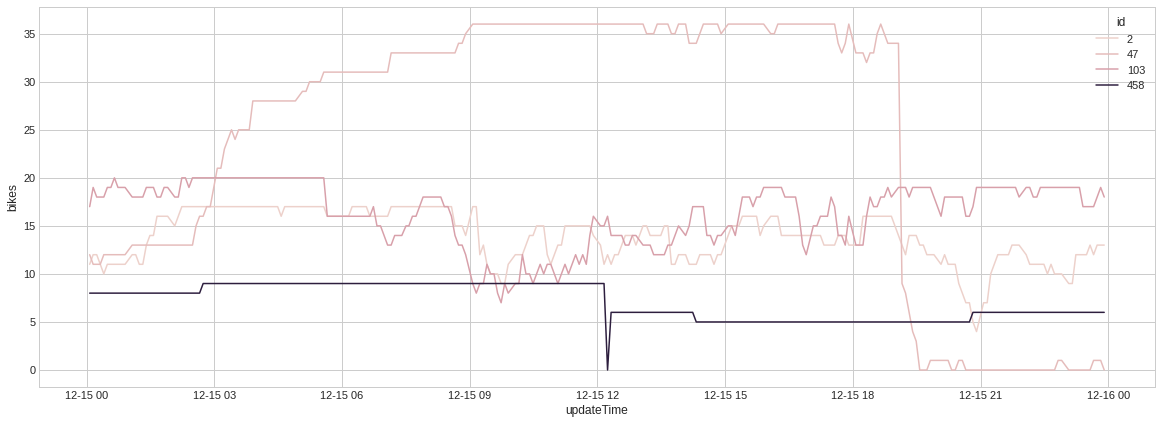

In [ ]:
ids= [2,458, 47, 103]
start = datetime(2018, 12, 15, 0, 0, 0)
end = datetime(2018, 12, 16, 0, 0, 0)
filters = {"id": {"$in": ids}, 'updateTime': {'$lt': end, '$gte': start}}
fields = {"id",'bikes','updateTime'}
query = list( mycol.find(filters,fields))
sns.lineplot(data=pd.DataFrame(query)[list(fields)], 
             x="updateTime", 
             y="bikes", 
             hue="id")
plt.show()

We see the availability of bicycles in December

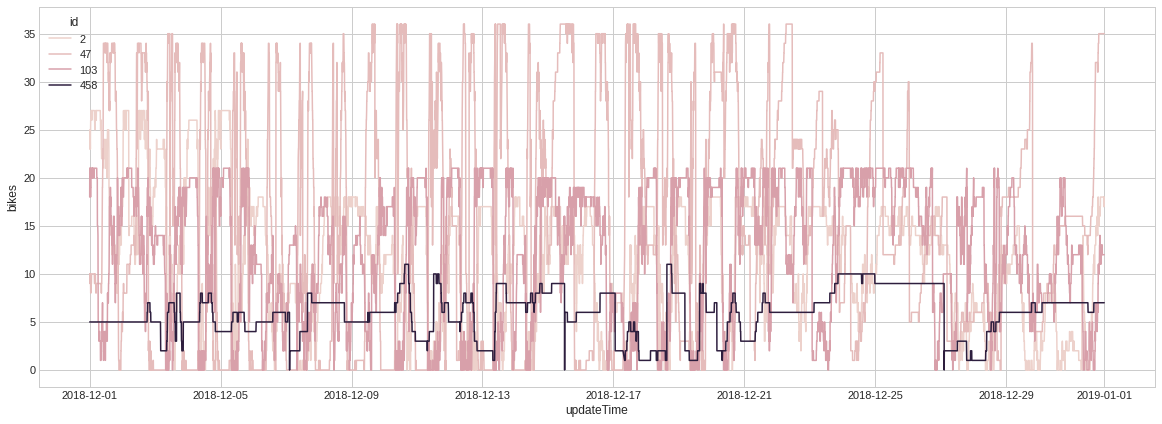

In [ ]:
ids= [2,458, 47, 103]
filters = {"id": {"$in": ids}}
fields = {'id', 'bikes','updateTime'}
query = list( mycol.find(filters,fields))
sns.lineplot(data=pd.DataFrame(query)[list(fields)], 
             x="updateTime", 
             y="bikes", 
             hue="id")
plt.show()

We select the electric bicycle stations that have 4 bicycles or less at a given time.
We print an alert message and show its locations on a map.

##6. Mark Bicing stations in map

In [ ]:
stationType = 'BIKE-ELECTRIC'
availableBikes = 4
timeStamp = datetime(2018, 11, 30, 23, 59, 14)

filters = {'type':  stationType ,'bikes' : {'$lte' : availableBikes },'updateTime' : {'$eq' : timeStamp}} 
fields = {'latitude' , 'longitude', 'bikes', 'slots'}
query = list( mycol.find(filters,fields))

print ('ALERT\nOn {} {} {} stations have {} bikes or less'.format(timeStamp,len(query), stationType, availableBikes))

locationmap = folium.Map(location = [41.378, 2.139], 
                         zoom_start = 12)
for i in range(len(query)):
    info = "Bikes:{}\nSlots:{}".format(query[i]['bikes'],query[i]['slots'])
    folium.Marker(location = [query[i]['latitude'],query[i]['longitude']],
                  popup = info,
                  icon = folium.Icon(color='red')).add_to(locationmap)
locationmap

ALERT
On 2018-11-30 23:59:14 9 BIKE-ELECTRIC stations have 4 bikes or less


![map](https://github.com/leobioinf0/Base_de_dades_NoSQL/blob/main/12_map.png?raw=true)